In [2]:
from astropy.coordinates import EarthLocation,SkyCoord
from sunpy.net import Fido, attrs as SAF
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.units as u
from tqdm import tqdm
import numpy as np 
import sunpy.map
import warnings
import sunpy
import glob 
import os
warnings.filterwarnings("ignore")

In [2]:
def cropping_sdo(Tx, Ty, alma_size_matrix, pizel_size_arcsec, instrument):
    """
    This function download and crop SDO cubes

    Last modified: F.J Ordoñez A,  7.01.2023

    Tx: float 
        Centre position in X   helio projective coordinates 
    Ty: float 
        Centre position in Y   helio projective coordinates 
    aiasq: float
        widht of desired region 
    """
    aiasq =  1.8*alma_size_matrix*pizel_size_arcsec/2
    wl    = [94,131,171,193,211,304,335,1600,1700]
    os.system('mkdir SDO')
    if  instrument == "AIA" or instrument == "aia" :
        for item in tqdm(wl):
            path_1 = 'SDO/{}/*.fits'.format(item)
            os.system('mkdir SDO/{}'.format(item))
            os.system('mkdir SDO/{}/crop'.format(item))
            file_download =sorted(glob.glob(path_1))
            print('Star to read .fits file. (This could be take a time, depends on the volume of data)')
            tmp = sunpy.map.Map(file_download)
            print('End to read  .fits file')
            aia_seq = []
            # cropping 
            print('|------Doing cropping------|')
            for img in tmp:
                top_right = SkyCoord((Tx+aiasq)*u.arcsec  , (Ty+aiasq)*u.arcsec, frame=img.coordinate_frame)
                bottom_left = SkyCoord((Tx-aiasq)*u.arcsec, (Ty-aiasq)*u.arcsec, frame=img.coordinate_frame)
                aia_seq.append(img.submap(bottom_left, top_right=top_right))
            new_files = [str('SDO/{}/crop/').format(item)+str('aia_{}_').format(fits.open(file_download[0])[1].header['WAVELNTH'])
                        +fits.open(file_download[a])[1].header['DATE-OBS']+str('_crop_v1.fits') for a in range(len(file_download))]
            for img, file_name in zip(aia_seq, new_files):
                img.save(file_name)
    if  instrument == "HMI" or instrument ==  "hmi":
        os.system('mkdir SDO/magt')
        os.system('mkdir SDO/magt/crop')
        path_mag='SDO/magt/*.fits'  
        #Saving HMI time sequence
        file_download = sorted(glob.glob(path_mag))
        ###Load all files in map sequence
        tmp = sunpy.map.Map(file_download)
        #Cropping defined area
        # In this case, we do not run aiaprep because we're only using one channel
        aia_seq = []  #It could be called hmi_seq but it is just a variable

        print('|-------Cropping HMI images-------|')
        for img in tqdm(tmp):
            top_right = SkyCoord((Tx+aiasq)*u.arcsec, (Ty+aiasq)*u.arcsec, frame=img.coordinate_frame)
            bottom_left = SkyCoord((Tx-aiasq)*u.arcsec, (Ty-aiasq)*u.arcsec, frame=img.coordinate_frame)
            aia_seq.append(img.submap(bottom_left, top_right=top_right))
        new_files =  [str('SDO/magt/crop/')+str('HMI_') +fits.open(file_download[a])[1].header['DATE-OBS'][:-1]+str('_crop_v1.fits') for a in range(len(file_download))]
        for img, file_name in zip(aia_seq, new_files):
            img.save(file_name)

    return print('The cropping process for SDO and HMIhasve finished.')

In [3]:
cropping_sdo(-128,-400, 253, 0.3,'hmi')

|-------Cropping HMI images-------|


100%|██████████| 60/60 [00:02<00:00, 26.02it/s]


The cropping process for SDO and HMIhasve finished.


In [4]:
cropping_sdo(-128,-400, 253, 0.3,'aia')

mkdir: cannot create directory ‘SDO’: File exists
  0%|          | 0/9 [00:00<?, ?it/s]

|------Doing cropping------|


 11%|█         | 1/9 [01:06<08:54, 66.81s/it]

|------Doing cropping------|


 22%|██▏       | 2/9 [02:18<08:09, 69.87s/it]

|------Doing cropping------|


 33%|███▎      | 3/9 [03:40<07:31, 75.26s/it]

|------Doing cropping------|


 44%|████▍     | 4/9 [05:05<06:35, 79.06s/it]

|------Doing cropping------|


 56%|█████▌    | 5/9 [06:28<05:22, 80.70s/it]

|------Doing cropping------|


 67%|██████▋   | 6/9 [07:43<03:55, 78.54s/it]

|------Doing cropping------|


 78%|███████▊  | 7/9 [08:56<02:33, 76.63s/it]

|------Doing cropping------|


 89%|████████▉ | 8/9 [09:32<01:03, 63.98s/it]

|------Doing cropping------|


100%|██████████| 9/9 [10:09<00:00, 67.67s/it]

The cropping process for SDO and HMIhasve finished.


In [27]:
## HMI
path_img_crop = 'SDO/magt/crop/*.fits'.format(item)
os.system('mkdir SDO/magt/crop_and_rotate'.format(item))
x_croped_image_sun = sorted(glob.glob(path_img_crop))
print('Star to read .fits file. (This could be take a time, depends on the volume of data)')
tmp                = sunpy.map.Map(x_croped_image_sun)
print('End to read  .fits file')

print('Creating  sunpy Map HMI')
aia_seq              = []
for i in range(0,len(tmp),1):    
    img= tmp[i].rotate(use_scipy=True, missing=0)
    aia_seq.append(img)

#new_files = [str('SDO/{}/crop_and_rotate/').format(item)+str('aia_{}_').format(fits.open(x_croped_image_sun[0])[0].header['WAVELNTH'])
#             +fits.open(x_croped_image_sun[a])[0].header['DATE-OBS']+
#             str('_crop_and_rotate.fits') for a in range(len(x_croped_image_sun))]
new_files = [str('SDO/magt/crop_and_rotate/')+str('hmi_{}_').format(fits.open(x_croped_image_sun[a])[0].header['DATE-OBS'][:-1])
                +str('_crop_and_rotate.fits') for a in range(len(x_croped_image_sun))]

for img, file_name in zip(aia_seq, new_files):
    img.save(file_name)

mkdir: cannot create directory ‘SDO/magt/crop_and_rotate’: File exists


Star to read .fits file. (This could be take a time, depends on the volume of data)
End to read  .fits file
Creating  sunpy Map HMI


In [25]:
## AIA
wl = [94,131,171,193,211,304,335,1600,1700]
os.system('mkdir SDO')
for item in tqdm(wl,colour='green'):
    path_img_crop = 'SDO/{}/crop/*.fits'.format(item)
    os.system('mkdir SDO/{}/crop_and_rotate'.format(item))
    x_croped_image_sun = sorted(glob.glob(path_img_crop))
    print('Star to read .fits file. (This could be take a time, depends on the volume of data)')
    tmp                = sunpy.map.Map(x_croped_image_sun)
    print('End to read  .fits file')

    print('Creating  sunpy Map AIA {}'.format(item))
    aia_seq              = []
    for i in range(0,len(tmp),1):    
        img= tmp[i].rotate(use_scipy=True, missing=0)
        aia_seq.append(img)
    
    #new_files = [str('SDO/{}/crop_and_rotate/').format(item)+str('aia_{}_').format(fits.open(x_croped_image_sun[0])[0].header['WAVELNTH'])
    #             +fits.open(x_croped_image_sun[a])[0].header['DATE-OBS']+
    #             str('_crop_and_rotate.fits') for a in range(len(x_croped_image_sun))]
    new_files = [str('SDO/{}/crop_and_rotate/').format(item)+str('aia_{}_').format(fits.open(x_croped_image_sun[a])[0].header['DATE-OBS'][:-1])
                 +str('_crop_and_rotate.fits') for a in range(len(x_croped_image_sun))]
    
    for img, file_name in zip(aia_seq, new_files):
        img.save(file_name)

mkdir: cannot create directory ‘SDO’: File exists
  0%|          | 0/9 [00:00<?, ?it/s]mkdir: cannot create directory ‘SDO/94/crop_and_rotate’: File exists


Star to read .fits file. (This could be take a time, depends on the volume of data)
End to read  .fits file
Creating  sunpy Map AIA 94


 11%|█         | 1/9 [00:33<04:29, 33.65s/it]

Star to read .fits file. (This could be take a time, depends on the volume of data)
End to read  .fits file
Creating  sunpy Map AIA 131


 22%|██▏       | 2/9 [00:57<03:14, 27.79s/it]

Star to read .fits file. (This could be take a time, depends on the volume of data)
End to read  .fits file
Creating  sunpy Map AIA 171


 33%|███▎      | 3/9 [01:20<02:34, 25.67s/it]

Star to read .fits file. (This could be take a time, depends on the volume of data)
End to read  .fits file
Creating  sunpy Map AIA 193


 44%|████▍     | 4/9 [01:42<02:02, 24.41s/it]

Star to read .fits file. (This could be take a time, depends on the volume of data)
End to read  .fits file
Creating  sunpy Map AIA 211


 56%|█████▌    | 5/9 [02:05<01:35, 23.76s/it]

Star to read .fits file. (This could be take a time, depends on the volume of data)
End to read  .fits file
Creating  sunpy Map AIA 304


 67%|██████▋   | 6/9 [02:28<01:10, 23.63s/it]

Star to read .fits file. (This could be take a time, depends on the volume of data)
End to read  .fits file
Creating  sunpy Map AIA 335


 78%|███████▊  | 7/9 [02:55<00:49, 24.62s/it]

Star to read .fits file. (This could be take a time, depends on the volume of data)
End to read  .fits file
Creating  sunpy Map AIA 1600


 89%|████████▉ | 8/9 [03:06<00:20, 20.40s/it]

Star to read .fits file. (This could be take a time, depends on the volume of data)
End to read  .fits file
Creating  sunpy Map AIA 1700


100%|██████████| 9/9 [03:18<00:00, 22.00s/it]


Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,94.0 Angstrom
Wavelength,94.0 Angstrom
Observation Date,2018-04-12 15:20:35
Exposure Time,2.900834 s
Dimension,[231. 231.] pix
Coordinate System,helioprojective
Scale,[0.600109 0.600109] arcsec / pix
Reference Pixel,[328.33034458 781.17957485] pix

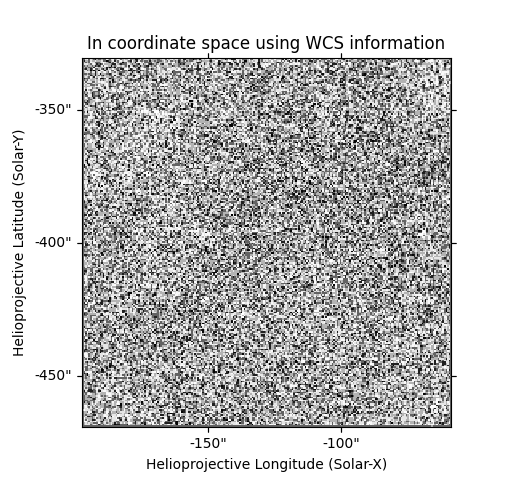
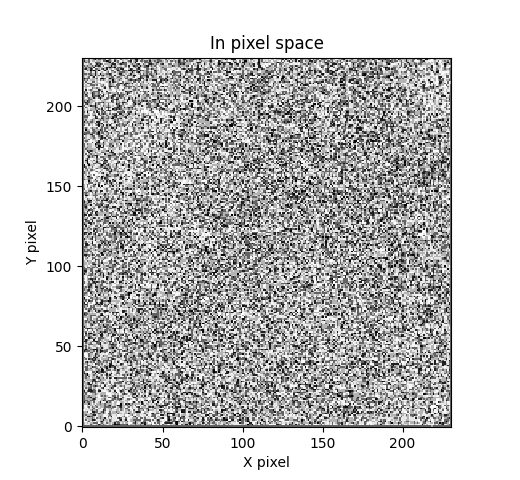
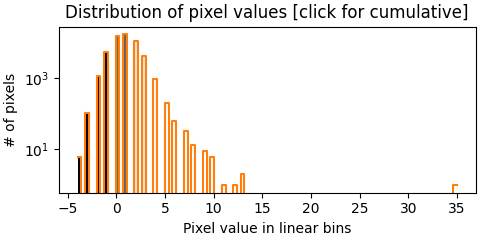
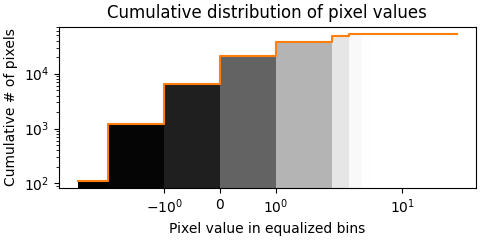

In [17]:
sunpy.map.Map('/home/javier/Documents/MSc-program/Aligning_auto/SDO/94/crop_and_rotate/aia_94_2018-04-12T15:20:35.12_crop_v_crop_and_rotate.fits')

Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,94.0 Angstrom
Wavelength,94.0 Angstrom
Observation Date,2018-04-12 15:20:35
Exposure Time,2.900834 s
Dimension,[229. 229.] pix
Coordinate System,helioprojective
Scale,[0.600109 0.600109] arcsec / pix
Reference Pixel,[ -97.72998 -552.689941] pix

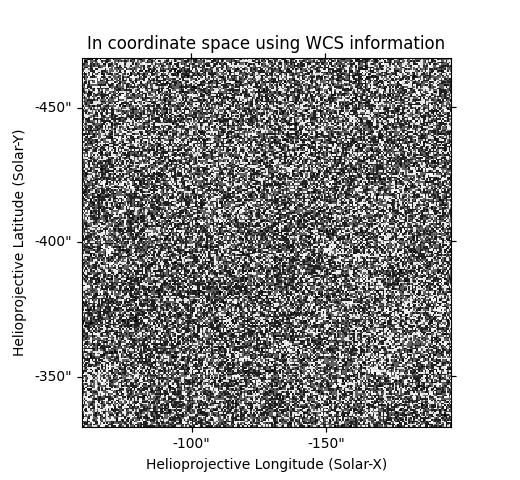
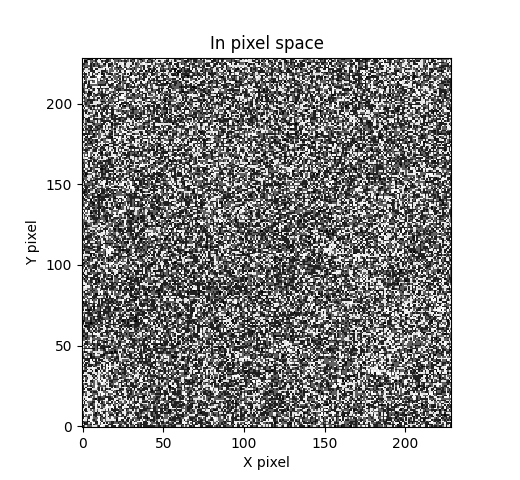
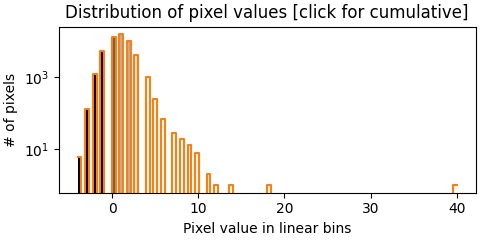
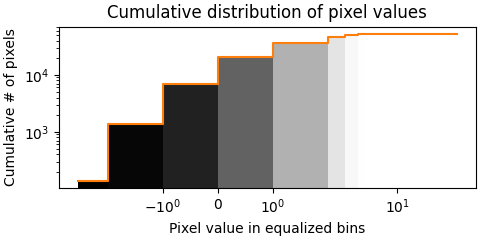

In [18]:
sunpy.map.Map('/home/javier/Documents/MSc-program/Aligning_auto/SDO/94/crop/aia_94_2018-04-12T15:20:35.12_crop_v1.fits')